<code>Task 5: Гистограмма
    1.Анализируйте только пользователей, а не администраторов.
    2.Используйте фильтр status = 'ready' для коммитов.
    3.Создайте два списка значений (для рабочих дней и для выходных) в качестве входных данных для гистограммы.
    4.Размер figsize остается прежним; размер шрифта и цветовую палитру выбирайте по своему вкусу.
    5.Используйте уровень прозрачности 0,7 для переднего слоя гистограммы.
    6.В конце Jupyter Notebook создайте markdown-ячейку и вставьте вопрос: «Существуют ли часы, когда общее количество коммитов было выше в выходные дни, чем в рабочие?». В своем ответе приведите примеры с 4 наибольшими значениями.
    </code>

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Коннект
con = sqlite3.connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite')

In [4]:
#Выборка данных из таблицы checker
sql = '''
      SELECT timestamp FROM checker 
      WHERE uid like "user_%"
      and status = "ready"
      '''

In [5]:
checker = pd.read_sql(sql, con, parse_dates = 'timestamp')
checker

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:45.549397
2,2020-04-17 05:34:24.422370
3,2020-04-17 05:43:27.773992
4,2020-04-17 05:46:32.275104
...,...
1681,2020-05-21 20:01:48.959966
1682,2020-05-21 20:18:54.487900
1683,2020-05-21 20:19:06.872761
1684,2020-05-21 20:22:41.877806


In [6]:
#Создадим два списка значений для рабочих и выходных дней
checker['hour'] = checker['timestamp'].dt.hour
checker['weekday'] = checker['timestamp'].dt.weekday
checker = checker.drop(columns = ['timestamp'])
checker['weekday'] = pd.cut(checker['weekday'], 
                bins = [0, 5, 7], 
                labels = ['working day', 'weekend'], 
                right = False)
checker.head()

,hour,weekday
0,5,working day
1,5,working day
2,5,working day
3,5,working day
4,5,working day


In [7]:
hist1 = checker[(checker.weekday == 'working day')]
hist1.head()

,hour,weekday
0,5,working day
1,5,working day
2,5,working day
3,5,working day
4,5,working day


In [8]:
hist2 = checker[(checker.weekday == 'weekend')]
hist2.head()

,hour,weekday
13,7,weekend
14,13,weekend
15,13,weekend
16,13,weekend
17,13,weekend


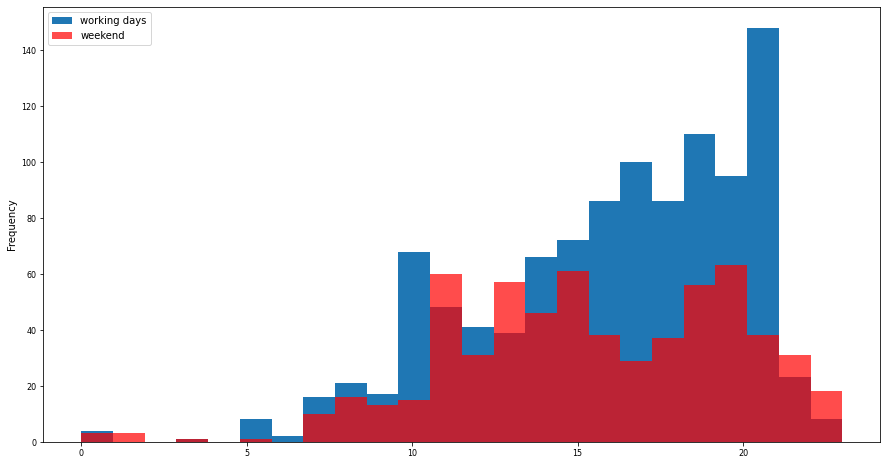

In [9]:
#График
hist2.plot( 
           kind = 'hist',
           bins = 24,
           fontsize = 8,
           figsize = (15,8),
           alpha = 0.7,
           color = ['red', 'blue'],
           ax = hist1.plot.hist(bins = 24))
plt.legend(['working days', 'weekend'], loc = 'upper left')
plt.show()

<code>__«Существуют ли часы, когда общее количество коммитов было выше в выходные дни, чем в рабочие?»..__
    __«Ответ: 2, 4, 11, 13, 22, 23»__
    
</code>

In [10]:
con.close()